# EDA on the training data

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
sns.set_style("darkgrid")
%matplotlib inline
%run -i ./Data_Processing/feature_info.py

In [2]:
training_data = pd.read_csv('./Datasets/training_data_full.csv')

# Distribution of the target variable

In [3]:
training_data.head(3)

,StateAbbr,StateDesc,CityName,CountyFIPS,TractFIPS,OBESITY_2017,Unemployment_trend,Unemployment_rate_2017,OBESITY_trend,CHECKUP_2017,...,BPMED_trend,CANCER_2017,CANCER_trend,BINGE_2017,BINGE_trend,HIGHCHOL_2017,HIGHCHOL_trend,DIABETES_2017,DIABETES_trend,DIABETES_3Y_Change_Percentage
0,AL,Alabama,Birmingham,1073,1073000100,46.4,-22.807018,4.4,-1.902748,74.8,...,-2.750000,5.3,1.923077,10.3,-10.434783,35.3,-12.623762,17.4,-4.918033,9.770115
1,AL,Alabama,Birmingham,1073,1073000300,47.8,-22.807018,4.4,0.631579,72.1,...,-2.241594,4.7,2.173913,10.5,-12.500000,36.8,-11.325301,19.8,0.507614,10.101010
2,AL,Alabama,Birmingham,1073,1073000400,45.7,-22.807018,4.4,-3.177966,76.6,...,-3.170732,5.3,1.923077,10.4,-10.344828,35.6,-15.839243,18.4,-6.122449,2.717391


In [4]:
np.mean(training_data['DIABETES_3Y_Change_Percentage'])

1.3889859594419893

#### Seems like a pretty big spread of the target variable. A lot of tracts stayed around the same, whiel some changed pretty dramatically

Text(0.5, 1.0, 'Diabetes Prevalence Percentage Changes 2017-2020, by Census Tract')

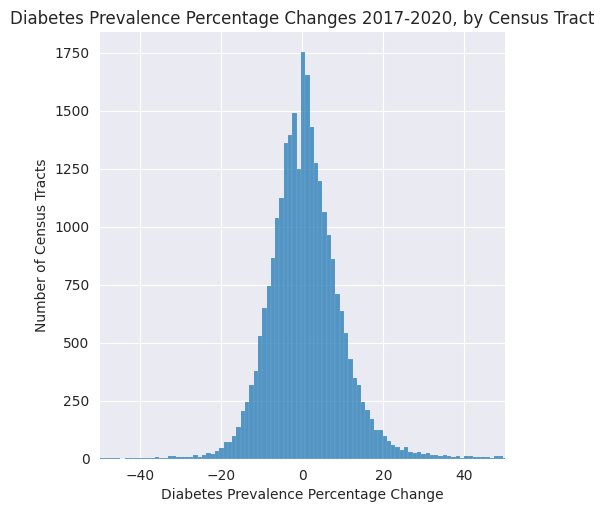

In [28]:

sns.displot(training_data['DIABETES_3Y_Change_Percentage'], bins=500)
# plt.figure(figsize=(15,6))

plt.xlim([-50,50])
plt.xlabel('Diabetes Prevalence Percentage Change')
plt.ylabel('Number of Census Tracts')
plt.title('Diabetes Prevalence Percentage Changes 2017-2020, by Census Tract')

# Check for collinearities in the numerical features

### Makes sense that a lot of the features related to cardiovascular health are pretty highly correlated.
### Such as Diabetes with COPD ( Chronic obstructure pulmonary disease) as well as Stroke incidence

In [6]:
non_numerical_features = set([
    'StateAbbr',
    'StateDesc',
    'CityName',
    'CountyFIPS',
    'TractFIPS'
])

target_features = set([
    'DIABETES_3Y_Change_Percentage'
])

numerical_features = set(training_data.columns) - non_numerical_features - target_features
numerical_features

{'ACCESS2_2017',
 'ACCESS2_trend',
 'ARTHRITIS_2017',
 'ARTHRITIS_trend',
 'BINGE_2017',
 'BINGE_trend',
 'BPHIGH_2017',
 'BPHIGH_trend',
 'BPMED_2017',
 'BPMED_trend',
 'CANCER_2017',
 'CANCER_trend',
 'CASTHMA_2017',
 'CASTHMA_trend',
 'CHD_2017',
 'CHD_trend',
 'CHECKUP_2017',
 'CHECKUP_trend',
 'CHOLSCREEN_2017',
 'CHOLSCREEN_trend',
 'COPD_2017',
 'COPD_trend',
 'CSMOKING_2017',
 'CSMOKING_trend',
 'DIABETES_2017',
 'DIABETES_trend',
 'HIGHCHOL_2017',
 'HIGHCHOL_trend',
 'KIDNEY_2017',
 'KIDNEY_trend',
 'LPA_2017',
 'LPA_trend',
 'MHLTH_2017',
 'MHLTH_trend',
 'OBESITY_2017',
 'OBESITY_trend',
 'PHLTH_2017',
 'PHLTH_trend',
 'STROKE_2017',
 'STROKE_trend',
 'Unemployment_rate_2017',
 'Unemployment_trend'}

/tmp/ipykernel_2482/3164012346.py:1: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  corr_map = training_data[numerical_features].corr()


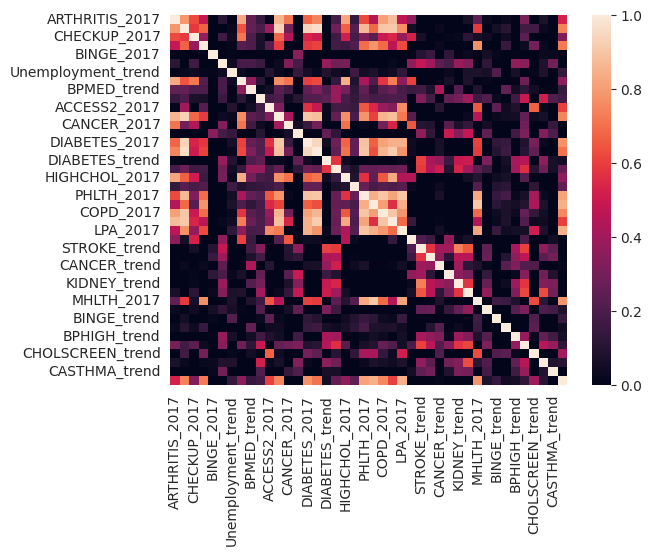

In [7]:
corr_map = training_data[numerical_features].corr()
sns.heatmap(corr_map, vmin=0, vmax=1);

## The Cardiovascular features are pretty strongly correlated with each other:

During modeling these should be combined into 1 or 2 columns

In [8]:
cardiovascular_features = [
    'COPD_2017', # Chronic obstructure pulmonary disease
    'STROKE_2017', # Stroke incidence
    'LPA_2017', # Low Physical Activity
    'BPHIGH_2017', # High BP Incidence
    'KIDNEY_2017' # Chronic kidney disease
]

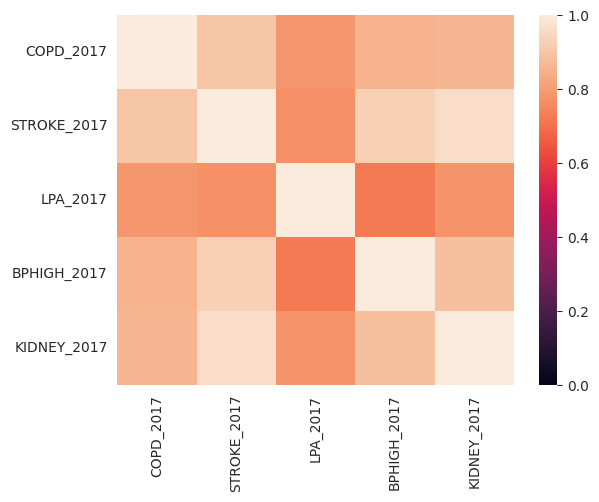

In [9]:
corr_map = training_data[cardiovascular_features].corr()
sns.heatmap(corr_map, vmin=0, vmax=1);

In [17]:
training_data[['OBESITY_2017', 'OBESITY_trend','DIABETES_2017', 'DIABETES_trend', 'Unemployment_rate_2017', 'Unemployment_trend', 'DIABETES_3Y_Change_Percentage']]

,OBESITY_2017,OBESITY_trend,DIABETES_2017,DIABETES_trend,Unemployment_rate_2017,Unemployment_trend,DIABETES_3Y_Change_Percentage
0,46.4,-1.902748,17.4,-4.918033,4.4,-22.807018,9.770115
1,47.8,0.631579,19.8,0.507614,4.4,-22.807018,10.101010
2,45.7,-3.177966,18.4,-6.122449,4.4,-22.807018,2.717391
3,48.0,-3.030303,22.4,-6.276151,4.4,-22.807018,5.803571
4,52.7,-1.310861,25.0,-4.214559,4.4,-22.807018,-1.200000
...,...,...,...,...,...,...,...
27114,28.9,1.048951,8.1,2.531646,3.8,-9.523810,-3.703704
27115,25.6,1.587302,8.8,1.149425,3.8,-9.523810,6.818182
27116,27.7,-0.359712,7.4,0.000000,3.8,-9.523810,4.054054
27117,30.9,-4.037267,9.4,-7.843137,3.8,-9.523810,-5.319149


In [13]:
np.mean(training_data['DIABETES_2017'])

10.817876765367455

In [15]:
training_data.columns

Index(['StateAbbr', 'StateDesc', 'CityName', 'CountyFIPS', 'TractFIPS',
       'OBESITY_2017', 'Unemployment_trend', 'Unemployment_rate_2017',
       'OBESITY_trend', 'CHECKUP_2017', 'CHECKUP_trend', 'MHLTH_2017',
       'MHLTH_trend', 'ARTHRITIS_2017', 'ARTHRITIS_trend', 'CASTHMA_2017',
       'CASTHMA_trend', 'CHOLSCREEN_2017', 'CHOLSCREEN_trend', 'ACCESS2_2017',
       'ACCESS2_trend', 'BPHIGH_2017', 'BPHIGH_trend', 'KIDNEY_2017',
       'KIDNEY_trend', 'PHLTH_2017', 'PHLTH_trend', 'STROKE_2017',
       'STROKE_trend', 'LPA_2017', 'LPA_trend', 'CHD_2017', 'CHD_trend',
       'CSMOKING_2017', 'CSMOKING_trend', 'COPD_2017', 'COPD_trend',
       'BPMED_2017', 'BPMED_trend', 'CANCER_2017', 'CANCER_trend',
       'BINGE_2017', 'BINGE_trend', 'HIGHCHOL_2017', 'HIGHCHOL_trend',
       'DIABETES_2017', 'DIABETES_trend', 'DIABETES_3Y_Change_Percentage'],
      dtype='object')